# Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [70]:
# Load dataset into a dataframe
df = pd.read_csv("C:\\Users\\HP\\Desktop\\kaggle\\IT Salary Survey EU  2020.csv")


## Data Assessment

In [52]:
#Get  the first five rows of the dataset
df.head(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",...,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
6,24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,...,NaN,27,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,600
8,24/11/2020 11:17:24,29.0,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,NaN
9,24/11/2020 11:17:50,35.0,Male,Berlin,Software Engineer,15,3,Lead,Java,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,NaN


In [53]:
# Display summary statistics of the dataset
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [54]:
#Evaluate size of the dataset
df.shape


(1253, 23)

In [55]:
#Check for null values 
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

Number of missing values in each column not significant hence no need for dropping rows

## Data Cleaning
 - Clean the data by looking for any problems such as 
 1. Incorrect Data types
 2. Missing Data(Null values)
 3. Duplicates

### Incorrect data types

In [56]:
#Check datatypes of the columns
df.dtypes


Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

In [57]:
## Timestamp is represented as object instead of datetime,thus we need to change it to datetime 

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### Duplicates

In [59]:
# Check for duplicates and drop them
sum(df.duplicated())

0

No duplicate rows

### Missing Data

Drop rows with null  values in the "Total years of experience column"

In [72]:
#Drop rows having only missing values
df = df.dropna(subset=['Total years of experience', 'Years of experience in Germany'])

In [73]:
df.shape


(1211, 23)

In [32]:
sum(df.duplicated())

0

In [43]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [44]:
df.dtypes

Timestamp                                                                                                                  datetime64[ns]
Age                                                                                                                               float64
Gender                                                                                                                             object
City                                                                                                                               object
Position                                                                                                                           object
Total years of experience                                                                                                          object
Years of experience in Germany                                                                                                     object
Seniority level                   

In [82]:
mean_salary = df['Yearly brutto salary (without bonus and stocks) in EUR'].mean()

In [88]:
df['Yearly brutto salary (without bonus and stocks) in EUR'].fillna(mean_salary,inplace = True)

## Exploratory Data Analysis 


In [122]:
df['Yearly brutto salary (without bonus and stocks) in EUR'] = df['Yearly brutto salary (without bonus and stocks) in EUR'].astype(int)



# Calculate the mean salary for each city
mean_salary_by_city = df.groupby('City')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()

mean_salary_by_city.head()










City
Aachen       40082.000000
Amsterdam    77141.666667
Ansbach      42000.000000
Barcelona    31000.000000
Berlin       73981.651128
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

 Here ,we see that Developers in Amsterdam and Berlin are paid more than their counterparts in other european cities

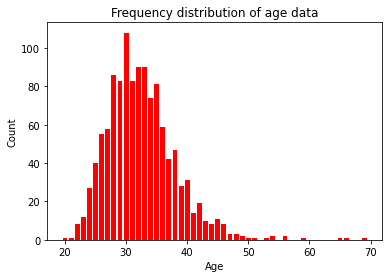

In [105]:


#Check distribution of Age

df_1=df['Age'].value_counts().rename_axis('age').reset_index(name='counts')
df_1

plt.bar(df_1['age'],df_1['counts'], color='red')
plt.title('Frequency distribution of age data')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



     


-Age has a normal distribution shich is skewed to the left.
-There are a few outliers past 50 years